In [1]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

Installing. Please wait... done!


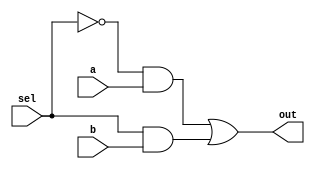

In [2]:
#mux2to1
%%print_verilog

module top_module(
    input a, b, sel,
    output out );

    assign out = (~sel & a) | (sel & b);

endmodule

In [3]:
%%verilog

//////////////////////////////////////////////////////////
module tb; reg a_tb, b_tb, sel_tb; wire out_tb;

  top_module top(.a(a_tb), .b(b_tb), .sel(sel_tb), .out(out_tb));

  initial begin
    $dumpfile("tb");
    $dumpvars();

    # 0 a_tb = 0; b_tb = 1; sel_tb = 1;
    # 1 a_tb = 1; b_tb = 0; sel_tb = 0;
    # 1 $finish;
  end
//////////////////////////////////////////////////////////

endmodule

//////////////////////////////////////////////////////////
module top_module(
    input a, b, sel,
    output out );

    assign out = (~sel & a) | (sel & b);

endmodule
//////////////////////////////////////////////////////////


VCD info: dumpfile tb.vcd opened for output.



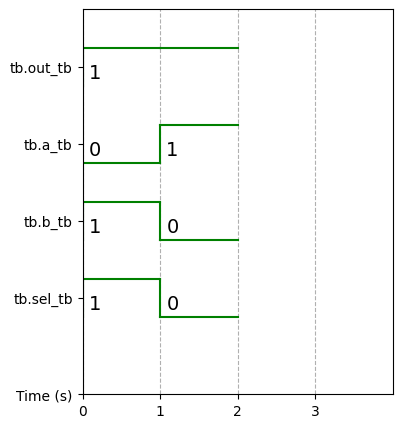

In [4]:
%%waveform tb.vcd
sign_list = ['tb.out_tb','tb.a_tb', 'tb.b_tb', 'tb.sel_tb']
time_begin = 0
time_end = 3
base = 'dec' # bin, dec, dec2, hex, octal